In [1]:
import sys,os,pickle,pdb,copy,itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt
import scipy
import sklearn

from sklearn.decomposition import NMF

In [305]:
signal_l

[array([[6.75837195],
        [6.83849138],
        [6.82084289],
        [6.86306357],
        [6.8259491 ],
        [6.7247538 ],
        [6.76071678],
        [6.66642076],
        [6.88494615],
        [7.10140578],
        [6.59080386],
        [6.80260274],
        [6.64421445],
        [6.76169527],
        [7.98613017],
        [8.23874393],
        [8.09250257],
        [8.13378203],
        [8.33517624],
        [8.08318563],
        [8.05522572],
        [8.27686921],
        [8.10684254],
        [7.95037876],
        [8.01730752],
        [7.9860687 ],
        [8.00300318],
        [8.11859099],
        [8.15409074],
        [8.03908362]]),
 array([[3.43215043],
        [3.26446574],
        [3.28601461],
        [3.35643068],
        [3.29963902],
        [3.31150314],
        [3.30736266],
        [3.32702586],
        [3.13991577],
        [3.24465796],
        [3.52058858],
        [3.25430995],
        [3.26072163],
        [3.31423109],
        [5.72918499],
        

In [311]:
signal.shape

(30, 2, 1)

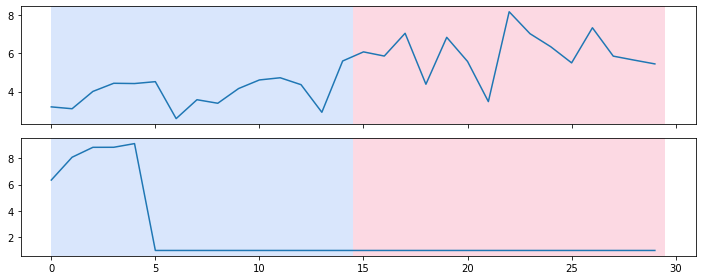

In [14]:
n = 30
dim = 2
sigma = 1
n_bkps=1
signal_l=[]
for d in range(dim):
    signal,bkps = rpt.pw_constant(n,1,n_bkps,noise_std=sigma,seed=d+20)
    signal = np.abs(signal)
    signal_l.append(signal)
signal = np.concatenate(signal_l,axis=1)
signal[5:,1] = 1
h_true = signal.T
rpt.display(signal,bkps)

n_neurons = 50
w_true = np.abs(np.random.normal(size=(n_neurons,2)))
# w_true[:int(n_neurons//2),0] = w_true[:int(n_neurons//2),0]*2
# w_true[int(n_neurons//2):,1] = w_true[int(n_neurons//2):,1]+1
r1 = w_true.dot(h_true)
X=copy.copy(r1)


In [7]:
from ruptures.base import BaseCost

In [121]:
sys.path.append('../nmf_analysis')
import nmf_cpd as nc
from importlib import reload
reload(nc)

<module 'nmf_cpd' from '/mnt/home/szheng/projects/place_variability/../nmf_analysis/nmf_cpd.py'>

In [126]:
# w_init,h_init = nc.random_init(X,2)
w_init,h_init=None,None
wfit,hfit,bkps_l,err_tot_l=nc.nmf_pwc_h_fit(X,2,n_bkps=2,max_iters_outer=100,max_iters_rank1=4,tol=1e-5,w_init=w_init,h_init=h_init)



In [127]:
err_tot_l

[1111.9745154771285,
 1064.600482932338,
 1059.0812789970269,
 1057.730197068644,
 1057.4045746892987,
 1057.3256809917261,
 1057.305491538311,
 1057.299233400984]

In [112]:
err_tot_l

[1509.645436424996,
 1494.4650328579871,
 1491.082035316557,
 1490.1972929531414,
 1489.9594203673846,
 1489.8867485661283,
 1489.8562105716696,
 1489.8367200135165,
 1489.820464860939,
 1489.8054760779219,
 1489.7912447391495]

In [107]:
w_ = wfit
h_ = hfit
c= 1
r1 = nc.leave_one_out_residual(X,w_,h_,c)
w1 = w_[:,[c]]
h1 = h_[[c],:]
# w1,h1,bkps,err_l=nc.rank1_pwc_h_fit(r1, n_bkps=1, w_init=w1, h_init=h1,tol=1e-10,max_iters=1)

In [44]:
h1=nc.rank1_pwc_h_update_h_full(r1,w1,n_bkps)
h1

(array([[5.65982915, 5.65982915, 5.65982915, 5.65982915, 5.65982915,
         5.65982915, 5.65982915, 5.65982915, 5.65982915, 5.65982915,
         5.65982915, 5.65982915, 5.65982915, 5.65982915, 5.65982915,
         5.65982915, 5.65982915, 5.65982915, 5.65982915, 5.65982915,
         5.65982915, 5.65982915, 5.65982915, 5.65982915, 5.65982915,
         5.65982915, 5.65982915, 5.65982915, 6.02561139, 6.02561139]]),
 array([ 0, 28, 30]))

In [46]:
algo = rpt.Dynp(model="", min_size=2, jump=1,custom_cost=nc.nmf_cost(w1)).fit((r1.T))
my_bkps = algo.predict(n_bkps=n_bkps)
bkps = np.insert(my_bkps,0,0)
# h1 = rank1_pwc_h_update_h_given_bkps(r1,w1,bkps)

In [54]:
algo.cost.error(0,28)+algo.cost.error(28,30)

52.27000291828544

In [56]:
algo.cost.error(0,14)+algo.cost.error(14,30)

58.90375928684584

In [58]:
algo = rpt.Dynp(model="l2", min_size=2, jump=1).fit(h_true[0,:])
my_bkps = algo.predict(n_bkps=n_bkps)
bkps = np.insert(my_bkps,0,0)
bkps
# h1 = rank1_pwc_h_update_h_given_bkps(r1,w1,bkps)

array([ 0, 14, 30])

In [59]:
algo = rpt.Dynp(model="l2", min_size=2, jump=1).fit(r1.T)
my_bkps = algo.predict(n_bkps=n_bkps)
bkps = np.insert(my_bkps,0,0)
bkps
# h1 = rank1_pwc_h_update_h_given_bkps(r1,w1,bkps)

array([ 0, 14, 30])

In [60]:
algo.cost.error(0,14)+algo.cost.error(14,30)

1730.5533638409754

In [64]:
h_true[0][:14].var()*len(h_true[0][:14])+h_true[0][14:].var()*len(h_true[0][14:])

25.98572111298793

In [65]:
c=28
h_true[0][:c].var()*len(h_true[0][:c])+h_true[0][c:].var()*len(h_true[0][c:])

59.86280336206858

In [88]:
c=14
np.linalg.norm(r1[:,:c]-h_true[0][:c].mean()*wfit[:,[1]]) + np.linalg.norm(r1[:,c:]-h_true[0][c:].mean()*wfit[:,[1]])

67.43840556990327

In [94]:
h_updated=np.concatenate([nc.rank1_constant_h_update_h(r1[:,:c],wfit[:,[1]]),nc.rank1_constant_h_update_h(r1[:,c:],wfit[:,[1]])],axis=1)
np.linalg.norm(r1-wfit[:,[1]].dot(h_updated))

41.65406121624464

In [95]:
np.linalg.norm(r1[:,:c]-wfit[:,[1]].dot(h_updated[:,:c])) + np.linalg.norm(r1[:,c:]-wfit[:,[1]].dot(h_updated[:,c:]))



58.90375928684584

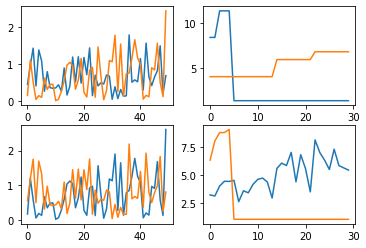

In [128]:
fig,axs=plt.subplots(2,2)
axs[0,0].plot(wfit)
axs[0,1].plot(hfit.T)

axs[1,0].plot(w_true)
axs[1,1].plot(h_true.T)

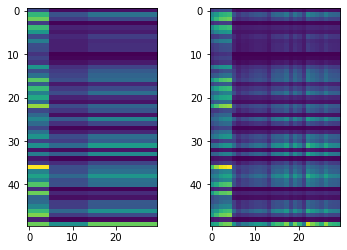

In [125]:
fig,axs=plt.subplots(1,2)
axs[0].imshow(wfit.dot(hfit))
axs[1].imshow(X)